In [2]:
# coding: utf-8

# Here goes the imports
import csv
import matplotlib.pyplot as plt

# Let's read the data as a list
print("Reading the document...")
with open("chicago.csv", "r") as file_read:
    reader = csv.reader(file_read)
    data_list = list(reader)
print("Ok!")

Reading the document...
Ok!


In [3]:
# Let's check how many rows do we have
print("Number of rows:")
print(len(data_list))

Number of rows:
1551506


In [4]:
# Printing the first row of data_list to check if it worked.
print("Row 0: ")
print(data_list[0])
# It's the data header, so we can identify the columns.

Row 0: 
['Start Time', 'End Time', 'Trip Duration', 'Start Station', 'End Station', 'User Type', 'Gender', 'Birth Year']


In [5]:
# Printing the second row of data_list, it should contain some data
print("Row 1: ")
print(data_list[1])

Row 1: 
['2017-01-01 00:00:36', '2017-01-01 00:06:32', '356', 'Canal St & Taylor St', 'Canal St & Monroe St (*)', 'Customer', '', '']


In [6]:
# TASK 1
# TODO: Print the first 20 rows using a loop to identify the data.
for ride in data_list[0:20]:
    print(ride)
# Let's change the data_list to remove the header from it.
data_list = data_list[1:]

['Start Time', 'End Time', 'Trip Duration', 'Start Station', 'End Station', 'User Type', 'Gender', 'Birth Year']
['2017-01-01 00:00:36', '2017-01-01 00:06:32', '356', 'Canal St & Taylor St', 'Canal St & Monroe St (*)', 'Customer', '', '']
['2017-01-01 00:02:54', '2017-01-01 00:08:21', '327', 'Larrabee St & Menomonee St', 'Sheffield Ave & Kingsbury St', 'Subscriber', 'Male', '1984.0']
['2017-01-01 00:06:06', '2017-01-01 00:18:31', '745', 'Orleans St & Chestnut St (NEXT Apts)', 'Ashland Ave & Blackhawk St', 'Subscriber', 'Male', '1985.0']
['2017-01-01 00:07:28', '2017-01-01 00:12:51', '323', 'Franklin St & Monroe St', 'Clinton St & Tilden St', 'Subscriber', 'Male', '1990.0']
['2017-01-01 00:07:57', '2017-01-01 00:20:53', '776', 'Broadway & Barry Ave', 'Sedgwick St & North Ave', 'Subscriber', 'Male', '1990.0']
['2017-01-01 00:10:44', '2017-01-01 00:21:27', '643', 'State St & Kinzie St', 'Wells St & Polk St', 'Subscriber', 'Male', '1970.0']
['2017-01-01 00:11:34', '2017-01-01 00:23:47', '7

In [7]:
# TASK 2
# TODO: Print the `gender` of the first 20 rows
print("\nTASK 2: Printing the genders of the first 20 samples")
for ride in data_list[0:20]:
    print(ride[6])

# Cool! We can get the rows(samples) iterating with a for and the columns(features) by index.
# But it's still hard to get a column in a list. Example: List with all genders


TASK 2: Printing the genders of the first 20 samples

Male
Male
Male
Male
Male
Male



Female

Male
Male
Female
Male
Male
Male
Female
Male


In [8]:
# TASK 3
# TODO: Create a function to add the columns(features) of a list in another list in the same order
def column_to_list(data, index):
    column_list = []
    # Tip: You can use a for to iterate over the samples, get the feature by index and append into a list
    for feature in data:
        column_list.append(feature[index])
    return column_list


# Let's check with the genders if it's working (only the first 20)
print("\nTASK 3: Printing the list of genders of the first 20 samples")
print(column_to_list(data_list, -2)[:20])

# ------------ DO NOT CHANGE ANY CODE HERE ------------
assert type(column_to_list(data_list, -2)) is list, "TASK 3: Wrong type returned. It should return a list."
assert len(column_to_list(data_list, -2)) == 1551505, "TASK 3: Wrong lenght returned."
assert column_to_list(data_list, -2)[0] == "" and column_to_list(data_list, -2)[1] == "Male", "TASK 3: The list doesn't match."
# -----------------------------------------------------


TASK 3: Printing the list of genders of the first 20 samples
['', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', '', '', '', 'Female', '', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Female', 'Male']


In [9]:
# Now we know how to access the features, let's count how many Males and Females the dataset have
# TASK 4
# TODO: Count each gender. You should not use a function to do that.
male = column_to_list(data_list, -2).count('Male')
female = column_to_list(data_list, -2).count('Female')


# Checking the result
print("\nTASK 4: Printing how many males and females we found")
print("Male: ", male, "\nFemale: ", female)

# ------------ DO NOT CHANGE ANY CODE HERE ------------
assert male == 935854 and female == 298784, "TASK 4: Count doesn't match."
# -----------------------------------------------------


TASK 4: Printing how many males and females we found
Male:  935854 
Female:  298784


In [10]:
# Why don't we creeate a function to do that?
# TASK 5
# TODO: Create a function to count the genders. Return a list
# Should return a list with [count_male, counf_female] (e.g., [10, 15] means 10 Males, 15 Females)
def count_gender(data_list):
    male = column_to_list(data_list, -2).count('Male')
    female = column_to_list(data_list, -2).count('Female')
    return [male, female]


print("\nTASK 5: Printing result of count_gender")
print(count_gender(data_list))

# ------------ DO NOT CHANGE ANY CODE HERE ------------
assert type(count_gender(data_list)) is list, "TASK 5: Wrong type returned. It should return a list."
assert len(count_gender(data_list)) == 2, "TASK 5: Wrong lenght returned."
assert count_gender(data_list)[0] == 935854 and count_gender(data_list)[1] == 298784, "TASK 5: Returning wrong result!"
# -----------------------------------------------------


TASK 5: Printing result of count_gender
[935854, 298784]


In [11]:
# Now we can count the users, which gender use it the most?
# TASK 6
# TODO: Create a function to get the most popular gender and print the gender as string.
# We expect to see "Male", "Female" or "Equal" as answer.
def most_popular_gender(data_list):
    male = column_to_list(data_list, -2).count('Male')
    female = column_to_list(data_list, -2).count('Female')
    if (male > female):
        answer = "Male"
    else:
        answer = "Female"

    return answer


print("\nTASK 6: Which one is the most popular gender?")
print("Most popular gender is: ", most_popular_gender(data_list))

# ------------ DO NOT CHANGE ANY CODE HERE ------------
assert type(most_popular_gender(data_list)) is str, "TASK 6: Wrong type returned. It should return a string."
assert most_popular_gender(data_list) == "Male", "TASK 6: Returning wrong result!"
# -----------------------------------------------------


TASK 6: Which one is the most popular gender?
Most popular gender is:  Male


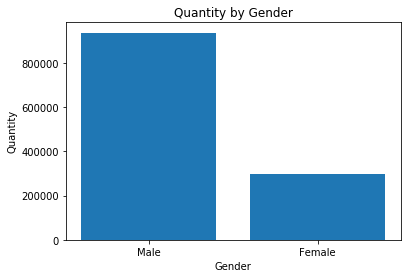

In [12]:
# If it's everything running as expected, check this graph!
gender_list = column_to_list(data_list, -2)
types = ["Male", "Female"]
quantity = count_gender(data_list)
y_pos = list(range(len(types)))
plt.bar(y_pos, quantity)
plt.ylabel('Quantity')
plt.xlabel('Gender')
plt.xticks(y_pos, types)
plt.title('Quantity by Gender')
plt.show(block=True)

In [13]:
# TASK 7
# TODO: Plot a similar graph for user_types. Make sure the legend is correct.
user_list = column_to_list(data_list, 5)
#types = ["Male", "Female"]
quantity = count_user(data_list)
y_pos = list(range(len(types)))
plt.bar(y_pos, quantity)
plt.ylabel('Quantity')
plt.xlabel('User Type')
plt.xticks(y_pos, types)
plt.title('Quantity by User Type')
plt.show(block=True)

NameError: name 'count_user' is not defined

In [14]:
# TASK 8
# TODO: Answer the following question
male, female = count_gender(data_list)
print("\nTASK 8: Why the following condition is False?")
print("male + female == len(data_list):", male + female == len(data_list))
answer = 'Temos campos vazios.'
print("Answer:", answer)

# ------------ DO NOT CHANGE ANY CODE HERE ------------
assert answer != "Type your answer here.", "TASK 8: Write your own answer!"
# -----------------------------------------------------



TASK 8: Why the following condition is False?
male + female == len(data_list): False
Answer: Temos campos vazios.


In [16]:
# TASK 9
# TODO: Find the Minimum, Maximum, Mean and Median trip duration.
# You should not use ready functions to do that, like max() or min().
trip_duration_list = column_to_list(data_list, 2)
min_trip = 0.
max_trip = 0.
mean_trip = 0.
median_trip = 0.

all=0

for trip in trip_duration_list:
    trip = int(trip)
    if trip < min_trip or min_trip == 0:
        min_trip = trip
    if trip > max_trip:
        max_trip = trip
    all += trip

mean_trip = all / len(trip_duration_list)
#trip_duration_list.sort()
#median_trip = trip_duration_list[int(len(trip_duration_list)/2)]
#Aprender a calcular median


print(len(trip_duration_list))
print(trip_duration_list[775750:775755])
print("\nTASK 9: Printing the min, max, mean and median")
print("Min: ", min_trip, "Max: ", max_trip, "Mean: ", mean_trip, "Median: ", median_trip)

# ------------ DO NOT CHANGE ANY CODE HERE ------------
assert round(min_trip) == 60, "TASK 9: min_trip with wrong result!"
assert round(max_trip) == 86338, "TASK 9: max_trip with wrong result!"
assert round(mean_trip) == 940, "TASK 9: mean_trip with wrong result!"
assert round(median_trip) == 670, "TASK 9: median_trip with wrong result!"
# -----------------------------------------------------

1551505
['444', '439', '761', '740', '202']

TASK 9: Printing the min, max, mean and median
Min:  60 Max:  86338 Mean:  939.7777590146342 Median:  0.0


AssertionError: TASK 9: median_trip with wrong result!

In [ ]:
# TASK 10
# Gender is easy because usually only have a few options. How about start_stations? How many options does it have?
# TODO: Check types how many start_stations do we have using set()
user_types = set()

print("\nTASK 10: Printing start stations:")
print(len(user_types))
print(user_types)

# ------------ DO NOT CHANGE ANY CODE HERE ------------
assert len(user_types) == 582, "TASK 10: Wrong len of start stations."
# -----------------------------------------------------

In [ ]:
# TASK 11
# Go back and make sure you documented your functions. Explain the input, output and what it do. Example:
# def new_function(param1: int, param2: str) -> list:
"""
      Example function with annotations.
      Args:
          param1: The first parameter.
          param2: The second parameter.
      Returns:
          List of X values

"""

In [ ]:
# TASK 12 - Challenge! (Optional)
# TODO: Create a function to count user types without hardcoding the types
# so we can use this function with a different kind of data.
print("Will you face it?")
answer = "no"

def count_items(column_list):
    item_types = []
    count_items = []
    return item_types, count_items


if answer == "yes":
    # ------------ DO NOT CHANGE ANY CODE HERE ------------
    column_list = column_to_list(data_list, -2)
    types, counts = count_items(column_list)
    print("\nTASK 11: Printing results for count_items()")
    print("Types:", types, "Counts:", counts)
    assert len(types) == 3, "TASK 11: There are 3 types of gender!"
    assert sum(counts) == 1551505, "TASK 11: Returning wrong result!"
    # -----------------------------------------------------